In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [184]:
df = pd.read_csv('synthetic_asthma_dataset.csv')

In [185]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'BMI', 'Smoking_Status',
       'Family_History', 'Allergies', 'Air_Pollution_Level',
       'Physical_Activity_Level', 'Occupation_Type', 'Comorbidities',
       'Medication_Adherence', 'Number_of_ER_Visits', 'Peak_Expiratory_Flow',
       'FeNO_Level', 'Has_Asthma', 'Asthma_Control_Level'],
      dtype='object')

In [186]:
df.head(20)

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN
5,ASTH100005,83,Other,27.8,Never,1,Pollen,Moderate,Moderate,Outdoor,NaN,0.18,2,232.9,45.1,0,NaN
6,ASTH100006,87,Female,32.3,Former,0,Pollen,Moderate,Sedentary,Outdoor,NaN,0.18,0,370.7,14.1,0,NaN
7,ASTH100007,75,Male,29.7,Never,0,Pets,High,Sedentary,Indoor,NaN,0.53,0,302.2,17.6,1,Poorly Controlled
8,ASTH100008,75,Male,23.1,Never,0,Pollen,Moderate,Moderate,Indoor,NaN,0.83,2,523.4,27.6,0,NaN
9,ASTH100009,88,Male,15.0,Current,1,NaN,Low,Active,Indoor,NaN,0.36,3,377.0,14.9,0,NaN


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               10000 non-null  object 
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   BMI                      10000 non-null  float64
 4   Smoking_Status           10000 non-null  object 
 5   Family_History           10000 non-null  int64  
 6   Allergies                7064 non-null   object 
 7   Air_Pollution_Level      10000 non-null  object 
 8   Physical_Activity_Level  10000 non-null  object 
 9   Occupation_Type          10000 non-null  object 
 10  Comorbidities            5033 non-null   object 
 11  Medication_Adherence     10000 non-null  float64
 12  Number_of_ER_Visits      10000 non-null  int64  
 13  Peak_Expiratory_Flow     10000 non-null  float64
 14  FeNO_Level             

In [188]:
df_corr = df.corr(numeric_only=True)
df_corr 

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma
Age,1.000000,-0.010078,0.007481,-0.005332,-0.014775,0.012447,0.012180,-0.004346
BMI,-0.010078,1.000000,-0.001244,-0.001318,0.003024,-0.000559,-0.005137,0.098425
Family_History,0.007481,-0.001244,1.000000,0.019463,0.020411,-0.009463,0.005389,0.409531
Medication_Adherence,-0.005332,-0.001318,0.019463,1.000000,-0.001243,-0.012747,0.019040,0.003785
Number_of_ER_Visits,-0.014775,0.003024,0.020411,-0.001243,1.000000,0.001293,0.009969,0.005781
Peak_Expiratory_Flow,0.012447,-0.000559,-0.009463,-0.012747,0.001293,1.000000,0.000575,-0.005207
FeNO_Level,0.012180,-0.005137,0.005389,0.019040,0.009969,0.000575,1.000000,0.007012
Has_Asthma,-0.004346,0.098425,0.409531,0.003785,0.005781,-0.005207,0.007012,1.000000


<Axes: >

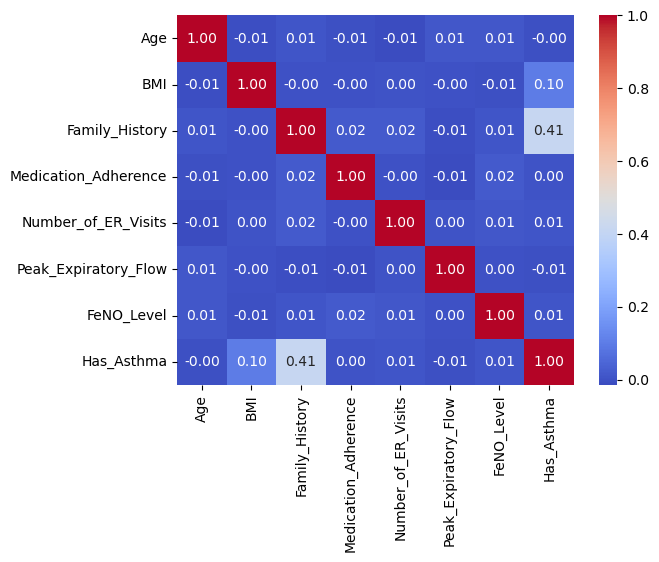

In [189]:
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')

In [190]:
df = df.drop(columns=['Asthma_Control_Level'])
df = df.set_index('Patient_ID')
df_encode = pd.get_dummies(df,columns=['Gender', 'Smoking_Status', 'Allergies', 'Air_Pollution_Level','Physical_Activity_Level','Occupation_Type','Comorbidities'])
df_encode.head(20)

,Age,BMI,Family_History,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Gender_Female,Gender_Male,...,Air_Pollution_Level_Low,Air_Pollution_Level_Moderate,Physical_Activity_Level_Active,Physical_Activity_Level_Moderate,Physical_Activity_Level_Sedentary,Occupation_Type_Indoor,Occupation_Type_Outdoor,Comorbidities_Both,Comorbidities_Diabetes,Comorbidities_Hypertension
Patient_ID,,,,,,,,,,,,,,,,,,,,,
ASTH100000,52,27.6,1,0.38,0,421.0,46.0,0,True,False,...,False,True,False,False,True,False,True,False,True,False
ASTH100001,15,24.6,0,0.60,2,297.6,22.9,0,False,True,...,True,False,False,True,False,True,False,True,False,False
ASTH100002,72,17.6,0,0.38,0,303.3,15.3,0,True,False,...,False,True,False,True,False,True,False,False,False,False
ASTH100003,61,16.8,0,0.60,1,438.0,40.1,1,False,True,...,False,False,False,False,True,False,True,True,False,False
ASTH100004,21,30.2,0,0.82,3,535.0,27.7,0,False,True,...,False,True,True,False,False,True,False,False,False,False
ASTH100005,83,27.8,1,0.18,2,232.9,45.1,0,False,False,...,False,True,False,True,False,False,True,False,False,False
ASTH100006,87,32.3,0,0.18,0,370.7,14.1,0,True,False,...,False,True,False,False,True,False,True,False,False,False
ASTH100007,75,29.7,0,0.53,0,302.2,17.6,1,False,True,...,False,False,False,False,True,True,False,False,False,False
ASTH100008,75,23.1,0,0.83,2,523.4,27.6,0,False,True,...,False,True,False,True,False,True,False,False,False,False


In [191]:
df_encode = df_encode.astype(int)

In [192]:
df_encode.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, ASTH100000 to ASTH109999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                10000 non-null  int64
 1   BMI                                10000 non-null  int64
 2   Family_History                     10000 non-null  int64
 3   Medication_Adherence               10000 non-null  int64
 4   Number_of_ER_Visits                10000 non-null  int64
 5   Peak_Expiratory_Flow               10000 non-null  int64
 6   FeNO_Level                         10000 non-null  int64
 7   Has_Asthma                         10000 non-null  int64
 8   Gender_Female                      10000 non-null  int64
 9   Gender_Male                        10000 non-null  int64
 10  Gender_Other                       10000 non-null  int64
 11  Smoking_Status_Current             10000 non-null  int64
 12  Smoking_S

In [193]:
x = df_encode.drop(columns=['Has_Asthma'])
y = df_encode['Has_Asthma']

In [194]:
#Using Logistic Regression
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LogisticRegression

model_logis = LogisticRegression()

model_logis.fit(x_train, y_train)

LogisticRegression()

In [195]:
y_pred = model_logis.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [196]:
y_test

Patient_ID
ASTH106252    0
ASTH104684    0
ASTH101731    0
ASTH104742    1
ASTH104521    0
             ..
ASTH108014    0
ASTH101074    0
ASTH103063    0
ASTH106487    1
ASTH104705    0
Name: Has_Asthma, Length: 3000, dtype: int64

In [197]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2256    6]
 [  66  672]]
0.976
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2262
           1       0.99      0.91      0.95       738

    accuracy                           0.98      3000
   macro avg       0.98      0.95      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [198]:
# Using KNN model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [199]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [200]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [201]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9073333333333333
Confusion Matrix:
 [[2227   35]
 [ 243  495]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      2262
           1       0.93      0.67      0.78       738

    accuracy                           0.91      3000
   macro avg       0.92      0.83      0.86      3000
weighted avg       0.91      0.91      0.90      3000



In [202]:
# Using Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)


GaussianNB()

In [203]:
y_pred = model.predict(x_test)

In [204]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
Confusion Matrix:
 [[2128  134]
 [ 116  622]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      2262
           1       0.82      0.84      0.83       738

    accuracy                           0.92      3000
   macro avg       0.89      0.89      0.89      3000
weighted avg       0.92      0.92      0.92      3000



In [205]:
#SVM
from sklearn.svm import SVC
model = SVC()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

In [206]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9806666666666667
Confusion Matrix:
 [[2262    0]
 [  58  680]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99      2262
           1       1.00      0.92      0.96       738

    accuracy                           0.98      3000
   macro avg       0.99      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



In [207]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6,        # limit tree depth
    min_samples_split=20,
    random_state=42)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)


In [208]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.938
Confusion Matrix:
 [[2208   54]
 [ 132  606]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2262
           1       0.92      0.82      0.87       738

    accuracy                           0.94      3000
   macro avg       0.93      0.90      0.91      3000
weighted avg       0.94      0.94      0.94      3000



In [210]:
import joblib
joblib.dump(model_logis, 'asthma_model.pkl')
joblib.dump(scaler, 'scaler.pkl') 
joblib.dump(x.columns.to_list(), 'features.pkl')


['features.pkl']

In [223]:
df['FeNO_Level'].describe()

count    10000.000000
mean        25.101420
std          9.840184
min          5.000000
25%         18.200000
50%         25.000000
75%         31.700000
max         63.900000
Name: FeNO_Level, dtype: float64

In [224]:
x.columns

Index(['Age', 'BMI', 'Family_History', 'Medication_Adherence',
       'Number_of_ER_Visits', 'Peak_Expiratory_Flow', 'FeNO_Level',
       'Gender_Female', 'Gender_Male', 'Gender_Other',
       'Smoking_Status_Current', 'Smoking_Status_Former',
       'Smoking_Status_Never', 'Allergies_Dust', 'Allergies_Multiple',
       'Allergies_Pets', 'Allergies_Pollen', 'Air_Pollution_Level_High',
       'Air_Pollution_Level_Low', 'Air_Pollution_Level_Moderate',
       'Physical_Activity_Level_Active', 'Physical_Activity_Level_Moderate',
       'Physical_Activity_Level_Sedentary', 'Occupation_Type_Indoor',
       'Occupation_Type_Outdoor', 'Comorbidities_Both',
       'Comorbidities_Diabetes', 'Comorbidities_Hypertension'],
      dtype='object')